In [29]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import pandas_ta
import matplotlib.pyplot as plt

In [52]:
# Fetch historical data from Yahoo Finance
symbol = 'SPY'
data = yf.download(symbol, period='30d', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [53]:
# Example: Recognize a candlestick pattern, e.g., Engulfing Pattern
doji = data.ta.cdl_pattern(name='engulfing')

# Add the pattern to the DataFrame
data['doji'] = doji

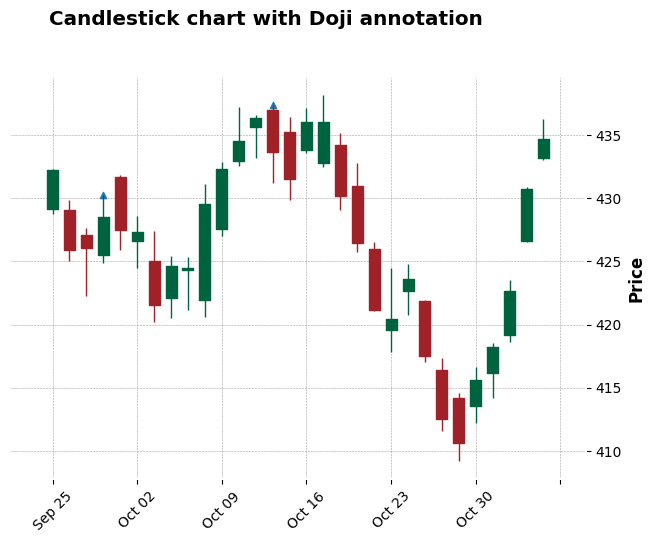

In [56]:
# Assuming 'df' is your DataFrame and the index is already in datetime format

# Find doji candlesticks
def doji_signal(doji, price):
    import numpy as np
    signal   = []
    for date,value in doji.items():
        if value == 0:
            signal.append(np.nan)
        else:
            signal.append(price[date])
    return signal

doji_days = doji_signal(data['doji'], data['High'])

# Create additional plot with scatter to mark doji candles
addplot = mpf.make_addplot(doji_days,type='scatter',markersize=20,marker='^')

# Plot the candlestick chart with the doji annotations
mpf.plot(data, type='candle', style='charles', addplot=addplot, title='Candlestick chart with Doji annotation')



In [43]:
data['doji'].items()


In [40]:
addplot

{'data': Date
 2023-03-02    398.690002
 2023-03-09    401.480011
 2023-03-24    395.839996
 2023-04-04    411.920013
 2023-04-06    409.480011
 2023-04-17    413.959991
 2023-05-12    413.640015
 2023-06-07    429.619995
 2023-06-22    436.619995
 2023-07-10    439.839996
 2023-07-17    451.929993
 2023-07-27    459.440002
 2023-08-04    452.899994
 2023-08-09    449.200012
 2023-08-24    445.220001
 2023-09-20    444.440002
 2023-09-28    430.250000
 2023-10-12    437.339996
 Name: High, dtype: float64,
 'scatter': False,
 'type': 'scatter',
 'mav': None,
 'panel': 0,
 'marker': '^',
 'markersize': 200,
 'color': 'blue',
 'linestyle': None,
 'linewidths': None,
 'edgecolors': None,
 'width': None,
 'bottom': 0,
 'alpha': 1,
 'secondary_y': 'auto',
 'y_on_right': None,
 'ylabel': None,
 'ylim': None,
 'title': None,
 'ax': None,
 'yscale': None,
 'stepwhere': 'pre',
 'marketcolors': None,
 'fill_between': None,
 'label': None}